# Step 1: Import Required Libraries

In [1]:
# Importing essential libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For data encoding and scaling
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import accuracy_score  # For evaluating model accuracy

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load and Explore the Dataset

In [6]:
# Load the dataset
data = pd.read_csv(r"D:\FSDS Material\Dataset\Classification\adult.csv")

# Preview the dataset
print(data.head())

# Check dataset information to identify missing values and data types
print(data.info())

# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

# Step 3: Handle Missing Values

In [9]:
# Replace '?' with NaN for consistent handling of missing values
data.replace('?', np.nan, inplace=True)

# Check for missing values
print(data.isnull().sum())

# Impute missing values in categorical columns with the mode (most frequent value)
for col in ['workclass', 'occupation', 'native.country']:
    data[col] = data[col].fillna(data[col].mode()[0])  # Assign the result back to the column

# Verify no missing values remain
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [11]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Step 4: Set Feature Matrix (X) and Target Variable (y)

In [14]:
# Separate feature matrix (X) and target variable (y)
X = data.drop(['income'], axis=1)  # Drop target column from features
y = data['income']  # Target variable

# Step 5: Split Data into Training and Test Sets

In [17]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 6: Encode Categorical Variables

In [20]:
# Encode categorical features using Label Encoding
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 
                    'relationship', 'race', 'sex', 'native.country']

le = LabelEncoder()
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Step 7: Feature Scaling

In [23]:
# Standardize features for consistent PCA application
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [25]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.392980,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.392980,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,3.763293,1.703439,0.870243,1.217715,-0.034095,-0.402341,-0.530388,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
22788,-0.191461,-0.090641,0.847831,0.184396,-0.423425,-0.402341,1.736225,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
22789,-0.923823,-0.090641,-1.302317,-2.140570,-0.812755,0.926666,1.232533,0.346032,-1.963453,0.699071,-0.145189,-0.217407,0.854891,0.262317
22790,0.394429,-0.090641,-0.704154,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317


In [27]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.273263,-0.090641,0.798307,-1.107252,-1.980744,2.255673,1.232533,1.591474,0.392980,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
1,-1.436476,-0.090641,0.448823,0.184396,-0.423425,0.926666,-0.278542,0.968753,0.392980,-1.430470,-0.145189,-0.217407,-1.256397,0.262317
2,-1.143531,-0.090641,-0.608164,1.217715,-0.034095,0.926666,0.225150,-0.276689,-3.141670,-1.430470,-0.145189,-0.217407,-0.444363,0.427425
3,-0.118225,-2.781760,-1.332357,-0.332263,1.133894,-0.402341,0.728841,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,0.760610,-0.090641,2.202540,0.442726,1.523223,-0.402341,1.232533,-0.899410,0.392980,0.699071,-0.145189,-0.217407,0.773687,0.262317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-0.118225,1.703439,-1.518569,0.184396,-0.423425,-0.402341,-0.530388,-0.899410,0.392980,0.699071,-0.145189,-0.217407,0.773687,0.262317
9765,-0.923823,-0.090641,-0.228829,0.184396,-0.423425,-0.402341,1.232533,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
9766,-0.997059,-0.090641,-0.312141,1.217715,-0.034095,0.926666,0.728841,0.968753,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
9767,-0.337933,-0.090641,-0.393536,0.184396,-0.423425,0.926666,-0.026696,1.591474,-1.963453,-1.430470,-0.145189,-0.217407,0.611281,0.262317


# Step 8: Train Logistic Regression with All Features

In [28]:
# Train Logistic Regression model on all features
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
print(f"Logistic Regression Accuracy (All Features): {accuracy_score(y_test, y_pred):.4f}".format(accuracy_score(y_test, y_pred)))

Logistic Regression Accuracy (All Features): 0.8218


# Step 9: Apply PCA for Dimensionality Reduction

In [36]:
# Apply PCA to reduce dimensionality
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance ratio for each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratio: [0.14757168 0.10182915 0.08147199 0.07880174 0.07463545 0.07274281
 0.07009602 0.06750902 0.0647268  0.06131155 0.06084207 0.04839584
 0.04265038 0.02741548]
Cumulative Explained Variance: [0.14757168 0.24940083 0.33087282 0.40967457 0.48431002 0.55705283
 0.62714886 0.69465787 0.75938468 0.82069623 0.8815383  0.92993414
 0.97258452 1.        ]


# Step 10: Determine Optimal Number of Dimensions

In [38]:
# Find the number of components to preserve 90% of variance
optimal_dims = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to preserve 90% variance: {optimal_dims}")

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_dims)
X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

Number of components to preserve 90% variance: 12


# Step 11: Train Logistic Regression with Reduced Features

In [49]:
# Train Logistic Regression with PCA-transformed features
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# Make predictions
y_pred_pca = logreg_pca.predict(X_test_pca)

# Calculate accuracy
print(f"Logistic Regression Accuracy (PCA Features): {accuracy_score(y_test, y_pred_pca):.4f}")

Logistic Regression Accuracy (PCA Features): 0.8209


# Step 12: Plot Explained Variance Ratio

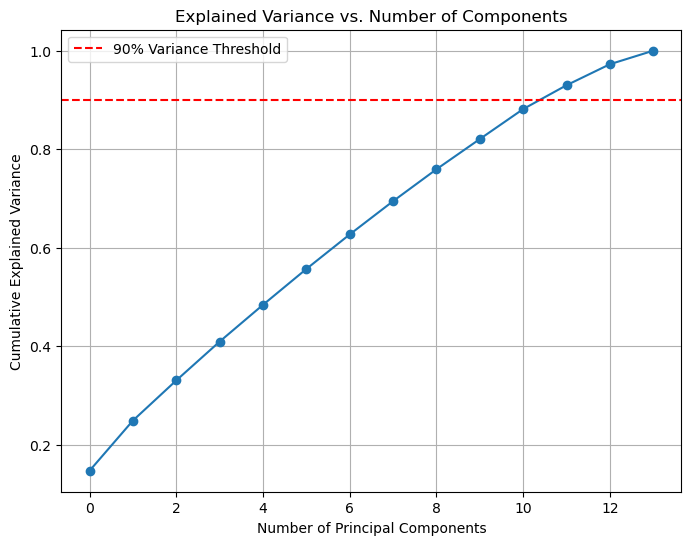

In [45]:
# Visualize cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.grid()
plt.show()